# Custormer Churn Machine Learning Project


---

## Dataset Overview & Features <a id="dataset-overview--features"></a>

This dataset provides insights into customer profiles and subscription patterns.
Each record represents one customer and includes features such as tenure, payment method, and contract type that influence customer retention.

### Features

| Feature            | Description                                                                  |
| ------------------ | ---------------------------------------------------------------------------- |
| **CustomerID**     | Unique identifier assigned to each customer.                                 |
| **Gender**         | Customer gender (Male/Female).                                               |
| **Age**            | Age of the customer (in years).                                              |
| **Geography**      | Country or region where the customer resides (France, Spain, Germany, etc.). |
| **Tenure**         | Number of months or years the customer has been with the company.            |
| **Contract**       | Type of contract (Month-to-month, One-year, Two-year).                       |
| **MonthlyCharges** | The amount billed to the customer each month.                                |
| **TotalCharges**   | The total amount billed to the customer over their entire tenure.            |
| **PaymentMethod**  | Method of payment (Credit card, Bank transfer, Direct debit, etc.).          |
| **IsActiveMember** | Indicates if the customer is actively engaged (1 = Active, 0 = Inactive).    |
| **Churn**          | Target variable indicating whether the customer left the service (Yes/No).   |

---

## Target Variable

**Churn** — The categorical target variable indicating customer retention.

| Class   | Description                                      |
| ------- | ------------------------------------------------ |
| **Yes** | Customer has discontinued the service (churned). |
| **No**  | Customer continues using the service (retained). |

---

---

## Goal

To develop a **machine learning model** capable of predicting **customer churn** using demographic, financial, and behavioral features.
The model aims to help businesses identify at-risk customers and implement retention strategies proactively.

---

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline

## Libraries Imported

## Data Loading and Structure

In [2]:
df = pd.read_csv('Large_Customer_Churn_Dataset.csv')
df.head()

,CustomerID,Gender,Age,Geography,Tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,IsActiveMember,Churn
0,1000001,Male,34,France,14,Two-year,21.58,7933.34,Bank transfer,1,No
1,1000002,Female,26,Spain,14,Month-to-month,27.71,5869.34,Credit card,0,Yes
2,1000003,Male,50,Germany,57,Two-year,111.12,6321.20,Bank transfer,1,No
3,1000004,Male,37,Spain,34,Month-to-month,55.49,7956.44,Bank transfer,0,Yes
4,1000005,Male,30,Spain,53,Two-year,62.48,4922.75,Direct debit,1,No


In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   Geography       1000 non-null   object 
 4   Tenure          1000 non-null   int64  
 5   Contract        1000 non-null   object 
 6   MonthlyCharges  1000 non-null   float64
 7   TotalCharges    1000 non-null   float64
 8   PaymentMethod   1000 non-null   object 
 9   IsActiveMember  1000 non-null   int64  
 10  Churn           1000 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [5]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Geography         0
Tenure            0
Contract          0
MonthlyCharges    0
TotalCharges      0
PaymentMethod     0
IsActiveMember    0
Churn             0
dtype: int64

### No missing values found

# Data Standardization

In [6]:
#Data Standardization Uinsg Dummny Variables
dummy_variables = pd.get_dummies(df['Churn'], drop_first=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [8]:
df['Contract'].value_counts()

Contract
Month-to-month    352
Two-year          336
One-year          312
Name: count, dtype: int64

In [9]:
df['Contract'] = df['Contract'].map({
    'Month-to-month': 1,
    'One-year': 12,
    'Two-year': 24
})

In [10]:
df

,CustomerID,Gender,Age,Geography,Tenure,Contract,MonthlyCharges,TotalCharges,PaymentMethod,IsActiveMember,Churn
0,1000001,Male,34,France,14,24,21.58,7933.34,Bank transfer,1,0
1,1000002,Female,26,Spain,14,1,27.71,5869.34,Credit card,0,1
2,1000003,Male,50,Germany,57,24,111.12,6321.20,Bank transfer,1,0
3,1000004,Male,37,Spain,34,1,55.49,7956.44,Bank transfer,0,1
4,1000005,Male,30,Spain,53,24,62.48,4922.75,Direct debit,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1000996,Male,42,France,44,24,32.75,6815.82,Bank transfer,1,1
996,1000997,Male,26,France,21,24,100.02,5544.36,Credit card,1,1
997,1000998,Female,21,France,44,24,106.30,2462.34,Credit card,1,0
998,1000999,Female,31,Italy,11,1,35.07,1771.42,Electronic check,1,0


In [11]:
dummy_variables = pd.get_dummies(df['Gender'], drop_first=True)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [12]:
df = df[['Age', 'Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'IsActiveMember', 'Churn']]
df

,Age,Tenure,Contract,MonthlyCharges,TotalCharges,IsActiveMember,Churn
0,34,14,24,21.58,7933.34,1,0
1,26,14,1,27.71,5869.34,0,1
2,50,57,24,111.12,6321.20,1,0
3,37,34,1,55.49,7956.44,0,1
4,30,53,24,62.48,4922.75,1,0
...,...,...,...,...,...,...,...
995,42,44,24,32.75,6815.82,1,1
996,26,21,24,100.02,5544.36,1,1
997,21,44,24,106.30,2462.34,1,0
998,31,11,1,35.07,1771.42,1,0


## Dataset Preparation

In [13]:
X = np.asarray(df[['Age', 'Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'IsActiveMember']])
X[0:5]

array([[3.40000e+01, 1.40000e+01, 2.40000e+01, 2.15800e+01, 7.93334e+03,
        1.00000e+00],
       [2.60000e+01, 1.40000e+01, 1.00000e+00, 2.77100e+01, 5.86934e+03,
        0.00000e+00],
       [5.00000e+01, 5.70000e+01, 2.40000e+01, 1.11120e+02, 6.32120e+03,
        1.00000e+00],
       [3.70000e+01, 3.40000e+01, 1.00000e+00, 5.54900e+01, 7.95644e+03,
        0.00000e+00],
       [3.00000e+01, 5.30000e+01, 2.40000e+01, 6.24800e+01, 4.92275e+03,
        1.00000e+00]])

In [14]:
y = np.asarray(df['Churn'])
y[0:5]

array([0, 1, 0, 1, 0])

In [15]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-0.64781259, -0.98488706,  1.24150764, -1.70556754,  1.73246436,
         0.99401789],
       [-1.17669316, -0.98488706, -1.17020483, -1.49019326,  0.80779477,
        -1.00601811],
       [ 0.40994855,  1.54197115,  1.24150764,  1.44037259,  1.01022752,
         0.99401789],
       [-0.44948237,  0.19039583, -1.17020483, -0.51415778,  1.74281313,
        -1.00601811],
       [-0.91225287,  1.30691458,  1.24150764, -0.26856786,  0.38372356,
         0.99401789]])

### Splitting the Dataset
The dataset was divided into training and testing sets for model development and evaluation.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

# Logistic Regression Model

In [17]:
#Call Logistic Regression Model
LR = LogisticRegression().fit(X_train, y_train)

In [18]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [19]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.50590622, 0.49409378],
       [0.57416161, 0.42583839],
       [0.54515732, 0.45484268],
       [0.45952073, 0.54047927],
       [0.41589392, 0.58410608],
       [0.4400923 , 0.5599077 ],
       [0.45323675, 0.54676325],
       [0.43191388, 0.56808612],
       [0.44925217, 0.55074783],
       [0.48079452, 0.51920548]])

# Model Prediction Visualization

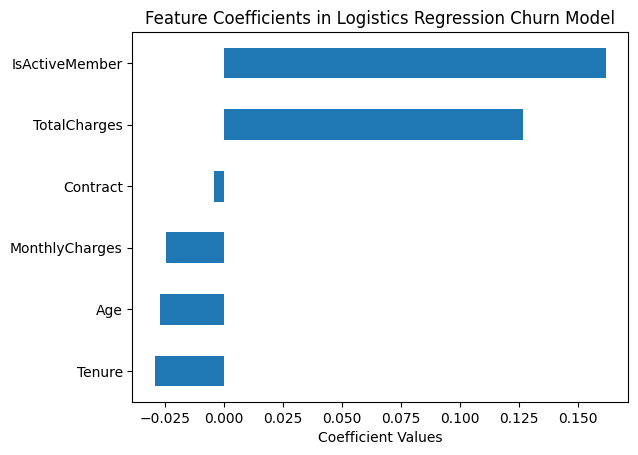

In [20]:
coefficients = pd.Series(LR.coef_[0], index=df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistics Regression Churn Model")
plt.xlabel("Coefficient Values")
plt.show()

# Model Evaluation

In [21]:
log_loss(y_test, yhat_prob)

0.7025267201970743